**Exploratory Data Analysis (EDA) on Customer Purchase Behavior**

The dataset used in this experiment contains detailed records of customer purchases, including fields such as CustomerID, Gender, PurchaseAmount, ProductCategory, City, and TransactionDate. It represents a large collection of transactional data from an e-commerce platform or retail environment, with over 100,000 entries. The dataset includes both numerical and categorical variables, making it suitable for comprehensive exploratory data analysis (EDA). It also contains real-world data challenges such as missing values, duplicates, and outliers, which were addressed through preprocessing. The primary focus of the analysis is to understand customer purchase behavior, detect spending patterns, and gain business insights that can inform pricing, marketing, and segmentation strategies.

**IMPORT LIBRARIES**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="whitegrid")

**LOAD DATA**

In [3]:
df = pd.read_csv("synthetic_data_with_missing_and_duplicates.csv")

In [4]:
df.head()

,CustomerID,Name,Age,Gender,PurchaseAmount,TransactionDate,ProductCategory,City
0,1,Customer_1,56,Female,203.66,14-03-2024,Books,Chicago
1,2,Customer_2,69,NaN,441.74,02-02-2024,Clothing,Chicago
2,3,Customer_3,46,Male,640.06,06-02-2024,Books,Chicago
3,4,Customer_4,32,Male,646.79,08-10-2024,Books,New York
4,5,Customer_5,60,Male,323.97,03-05-2024,NaN,Phoenix


In [5]:
df.tail()

,CustomerID,Name,Age,Gender,PurchaseAmount,TransactionDate,ProductCategory,City
124995,58645,Customer_58645,62,Other,857.24,19-11-2024,NaN,Houston
124996,14269,Customer_14269,55,NaN,940.76,17-03-2024,Grocery,Los Angeles
124997,112532,Customer_112532,53,Male,830.20,19-10-2024,Clothing,Chicago
124998,58366,Customer_58366,46,Male,637.49,16-02-2024,Electronics,Houston
124999,7488,Customer_7488,20,Male,690.04,06-07-2024,Grocery,Houston


**BASIC INFO & SUMMARY**

In [59]:
df.shape

(125000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125000 entries, 0 to 124999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CustomerID       125000 non-null  int64  
 1   Name             125000 non-null  object 
 2   Age              125000 non-null  int64  
 3   Gender           112462 non-null  object 
 4   PurchaseAmount   125000 non-null  float64
 5   TransactionDate  125000 non-null  object 
 6   ProductCategory  112489 non-null  object 
 7   City             118686 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 7.6+ MB


In [8]:
df.describe()

,CustomerID,Age,PurchaseAmount
count,125000.000000,125000.000000,125000.000000
mean,59981.923992,43.515432,504.993533
std,34645.238810,14.974611,286.256759
min,1.000000,18.000000,10.010000
25%,29973.750000,31.000000,255.857500
50%,59973.500000,44.000000,505.650000
75%,89978.250000,56.000000,752.785000
max,120000.000000,69.000000,1000.000000


In [9]:
df.isnull().sum()

CustomerID             0
Name                   0
Age                    0
Gender             12538
PurchaseAmount         0
TransactionDate        0
ProductCategory    12511
City                6314
dtype: int64

In [61]:
print("\nColumn names:")
df.columns.tolist()


Column names:


['CustomerID',
 'Name',
 'Age',
 'Gender',
 'PurchaseAmount',
 'TransactionDate',
 'ProductCategory',
 'City']

**PREPROCESSING OF DATA**

In [11]:
duplicates = df[df.duplicated()]
print(duplicates)

        CustomerID             Name  Age  Gender  PurchaseAmount  \
120000       76468   Customer_76468   22  Female           73.72   
120001       27992   Customer_27992   27  Female          240.96   
120002       62647   Customer_62647   41     NaN          608.19   
120003       28375   Customer_28375   20    Male          507.62   
120004       98306   Customer_98306   57     NaN          624.54   
...            ...              ...  ...     ...             ...   
124995       58645   Customer_58645   62   Other          857.24   
124996       14269   Customer_14269   55     NaN          940.76   
124997      112532  Customer_112532   53    Male          830.20   
124998       58366   Customer_58366   46    Male          637.49   
124999        7488    Customer_7488   20    Male          690.04   

       TransactionDate ProductCategory         City  
120000      08-08-2024     Electronics      Chicago  
120001      15-11-2024     Electronics      Chicago  
120002      09-03-202

In [12]:
duplicate_count = df.duplicated().sum()

In [13]:
print(f'Number of duplicate rows: {duplicate_count}')

Number of duplicate rows: 5000


**1.CUSTOMERID**

In [14]:
df['CustomerID']

0              1
1              2
2              3
3              4
4              5
           ...  
124995     58645
124996     14269
124997    112532
124998     58366
124999      7488
Name: CustomerID, Length: 125000, dtype: int64

In [15]:
df['CustomerID'].unique()

array([     1,      2,      3, ..., 119998, 119999, 120000],
      shape=(120000,))

In [16]:
df['CustomerID'].nunique()

120000

**2.Name**

In [17]:
df[['Name']]

,Name
0,Customer_1
1,Customer_2
2,Customer_3
3,Customer_4
4,Customer_5
...,...
124995,Customer_58645
124996,Customer_14269
124997,Customer_112532
124998,Customer_58366


In [18]:
df['Name'].unique()

array(['Customer_1', 'Customer_2', 'Customer_3', ..., 'Customer_119998',
       'Customer_119999', 'Customer_120000'],
      shape=(120000,), dtype=object)

In [19]:
df['Name'].nunique()

120000

**3.AGE**

In [20]:
df['Age']

0         56
1         69
2         46
3         32
4         60
          ..
124995    62
124996    55
124997    53
124998    46
124999    20
Name: Age, Length: 125000, dtype: int64

In [21]:
df['Age'].unique()

array([56, 69, 46, 32, 60, 25, 38, 36, 40, 28, 41, 53, 57, 20, 39, 19, 61,
       47, 55, 50, 29, 42, 66, 44, 59, 45, 33, 64, 68, 54, 24, 26, 35, 21,
       31, 67, 43, 37, 52, 34, 23, 51, 27, 48, 65, 62, 58, 18, 22, 30, 49,
       63])

In [22]:
df['Age'].nunique()

52

**4.GENDER**

In [23]:
df['Gender']

0         Female
1            NaN
2           Male
3           Male
4           Male
           ...  
124995     Other
124996       NaN
124997      Male
124998      Male
124999      Male
Name: Gender, Length: 125000, dtype: object

In [24]:
df['Gender'].unique()

array(['Female', nan, 'Male', 'Other'], dtype=object)

In [25]:
df['Gender'].nunique()

3

**5.PurchaseAmount**

In [26]:
df['PurchaseAmount']

0         203.66
1         441.74
2         640.06
3         646.79
4         323.97
           ...  
124995    857.24
124996    940.76
124997    830.20
124998    637.49
124999    690.04
Name: PurchaseAmount, Length: 125000, dtype: float64

In [27]:
df['PurchaseAmount'].unique()

array([203.66, 441.74, 640.06, ..., 820.96, 283.14,  89.26],
      shape=(69767,))

In [28]:
df['PurchaseAmount'].nunique()

69767

**6.TransactionDate**

In [29]:
df['TransactionDate']

0         14-03-2024
1         02-02-2024
2         06-02-2024
3         08-10-2024
4         03-05-2024
             ...    
124995    19-11-2024
124996    17-03-2024
124997    19-10-2024
124998    16-02-2024
124999    06-07-2024
Name: TransactionDate, Length: 125000, dtype: object

In [30]:
df['TransactionDate'].unique()

array(['14-03-2024', '02-02-2024', '06-02-2024', '08-10-2024',
       '03-05-2024', '03-10-2024', '22-12-2024', '04-05-2024',
       '04-06-2024', '06-07-2024', '08-02-2024', '26-12-2024',
       '10-12-2024', '17-03-2024', '06-01-2024', '15-08-2024',
       '02-03-2024', '16-01-2024', '06-06-2024', '02-12-2024',
       '28-12-2024', '17-09-2024', '02-06-2024', '25-05-2024',
       '01-02-2024', '02-04-2024', '11-07-2024', '27-09-2024',
       '27-08-2024', '24-12-2024', '22-04-2024', '20-09-2024',
       '01-07-2024', '21-05-2024', '04-01-2024', '28-02-2024',
       '09-01-2024', '12-04-2024', '04-10-2024', '05-08-2024',
       '11-03-2024', '21-04-2024', '09-03-2024', '14-02-2024',
       '07-08-2024', '23-11-2024', '21-08-2024', '27-11-2024',
       '21-12-2024', '16-02-2024', '25-03-2024', '18-10-2024',
       '05-07-2024', '28-03-2024', '15-02-2024', '07-09-2024',
       '13-10-2024', '28-10-2024', '18-01-2024', '14-09-2024',
       '09-02-2024', '13-04-2024', '08-07-2024', '06-09

In [31]:
df['TransactionDate'].nunique()

365

**7.ProductCategory**

In [32]:
df['ProductCategory']

0               Books
1            Clothing
2               Books
3               Books
4                 NaN
             ...     
124995            NaN
124996        Grocery
124997       Clothing
124998    Electronics
124999        Grocery
Name: ProductCategory, Length: 125000, dtype: object

In [33]:
df['ProductCategory'].unique()

array(['Books', 'Clothing', nan, 'Grocery', 'Electronics'], dtype=object)

In [34]:
df['ProductCategory'].nunique()

4

**8.CITY**

In [35]:
df['City']

0             Chicago
1             Chicago
2             Chicago
3            New York
4             Phoenix
             ...     
124995        Houston
124996    Los Angeles
124997        Chicago
124998        Houston
124999        Houston
Name: City, Length: 125000, dtype: object

In [36]:
df['City'].unique()

array(['Chicago', 'New York', 'Phoenix', 'Houston', 'Los Angeles', nan],
      dtype=object)

In [37]:
df['City'].nunique()

5

In [38]:
df.isnull()

,CustomerID,Name,Age,Gender,PurchaseAmount,TransactionDate,ProductCategory,City
0,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
124995,False,False,False,False,False,False,True,False
124996,False,False,False,True,False,False,False,False
124997,False,False,False,False,False,False,False,False
124998,False,False,False,False,False,False,False,False


In [39]:
df.isnull().sum()

CustomerID             0
Name                   0
Age                    0
Gender             12538
PurchaseAmount         0
TransactionDate        0
ProductCategory    12511
City                6314
dtype: int64

HANDLING MISSING VALUES

In [40]:
df.isnull()

,CustomerID,Name,Age,Gender,PurchaseAmount,TransactionDate,ProductCategory,City
0,False,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...
124995,False,False,False,False,False,False,True,False
124996,False,False,False,True,False,False,False,False
124997,False,False,False,False,False,False,False,False
124998,False,False,False,False,False,False,False,False


In [41]:
df.isnull().sum()

CustomerID             0
Name                   0
Age                    0
Gender             12538
PurchaseAmount         0
TransactionDate        0
ProductCategory    12511
City                6314
dtype: int64

In [42]:
df = df.copy()
df.fillna({
    'Name': 'Customer1807',
    'ProductCategory': 'None',
    'Gender': 'Female',
    'City': 'Chicago'
}, inplace=True)

In [43]:
df.isnull().sum()

CustomerID         0
Name               0
Age                0
Gender             0
PurchaseAmount     0
TransactionDate    0
ProductCategory    0
City               0
dtype: int64

In [44]:
df

,CustomerID,Name,Age,Gender,PurchaseAmount,TransactionDate,ProductCategory,City
0,1,Customer_1,56,Female,203.66,14-03-2024,Books,Chicago
1,2,Customer_2,69,Female,441.74,02-02-2024,Clothing,Chicago
2,3,Customer_3,46,Male,640.06,06-02-2024,Books,Chicago
3,4,Customer_4,32,Male,646.79,08-10-2024,Books,New York
4,5,Customer_5,60,Male,323.97,03-05-2024,None,Phoenix
...,...,...,...,...,...,...,...,...
124995,58645,Customer_58645,62,Other,857.24,19-11-2024,None,Houston
124996,14269,Customer_14269,55,Female,940.76,17-03-2024,Grocery,Los Angeles
124997,112532,Customer_112532,53,Male,830.20,19-10-2024,Clothing,Chicago
124998,58366,Customer_58366,46,Male,637.49,16-02-2024,Electronics,Houston


In [45]:
df.dropna()

,CustomerID,Name,Age,Gender,PurchaseAmount,TransactionDate,ProductCategory,City
0,1,Customer_1,56,Female,203.66,14-03-2024,Books,Chicago
1,2,Customer_2,69,Female,441.74,02-02-2024,Clothing,Chicago
2,3,Customer_3,46,Male,640.06,06-02-2024,Books,Chicago
3,4,Customer_4,32,Male,646.79,08-10-2024,Books,New York
4,5,Customer_5,60,Male,323.97,03-05-2024,None,Phoenix
...,...,...,...,...,...,...,...,...
124995,58645,Customer_58645,62,Other,857.24,19-11-2024,None,Houston
124996,14269,Customer_14269,55,Female,940.76,17-03-2024,Grocery,Los Angeles
124997,112532,Customer_112532,53,Male,830.20,19-10-2024,Clothing,Chicago
124998,58366,Customer_58366,46,Male,637.49,16-02-2024,Electronics,Houston


In [46]:
df.shape

(125000, 8)

In [47]:
df

,CustomerID,Name,Age,Gender,PurchaseAmount,TransactionDate,ProductCategory,City
0,1,Customer_1,56,Female,203.66,14-03-2024,Books,Chicago
1,2,Customer_2,69,Female,441.74,02-02-2024,Clothing,Chicago
2,3,Customer_3,46,Male,640.06,06-02-2024,Books,Chicago
3,4,Customer_4,32,Male,646.79,08-10-2024,Books,New York
4,5,Customer_5,60,Male,323.97,03-05-2024,None,Phoenix
...,...,...,...,...,...,...,...,...
124995,58645,Customer_58645,62,Other,857.24,19-11-2024,None,Houston
124996,14269,Customer_14269,55,Female,940.76,17-03-2024,Grocery,Los Angeles
124997,112532,Customer_112532,53,Male,830.20,19-10-2024,Clothing,Chicago
124998,58366,Customer_58366,46,Male,637.49,16-02-2024,Electronics,Houston


In [48]:
top_10=df.sort_values(by='PurchaseAmount', ascending=False).head(10)
print(top_10)

        CustomerID             Name  Age  Gender  PurchaseAmount  \
93645        93646   Customer_93646   41  Female         1000.00   
116743      116744  Customer_116744   30  Female         1000.00   
105970      105971  Customer_105971   35    Male          999.99   
112381      112382  Customer_112382   38    Male          999.98   
122013      100110  Customer_100110   38   Other          999.98   
100109      100110  Customer_100110   38   Other          999.98   
33861        33862   Customer_33862   54  Female          999.97   
61129        61130   Customer_61130   48    Male          999.96   
31401        31402   Customer_31402   57  Female          999.94   
7626          7627    Customer_7627   21  Female          999.93   

       TransactionDate ProductCategory         City  
93645       07-10-2024            None  Los Angeles  
116743      05-07-2024        Clothing     New York  
105970      18-04-2024           Books  Los Angeles  
112381      25-01-2024     Electron

**EXPLORING DATA**

**PLOT1 : TOP 10 VALUES OF PURCHASE AMOUNTS**

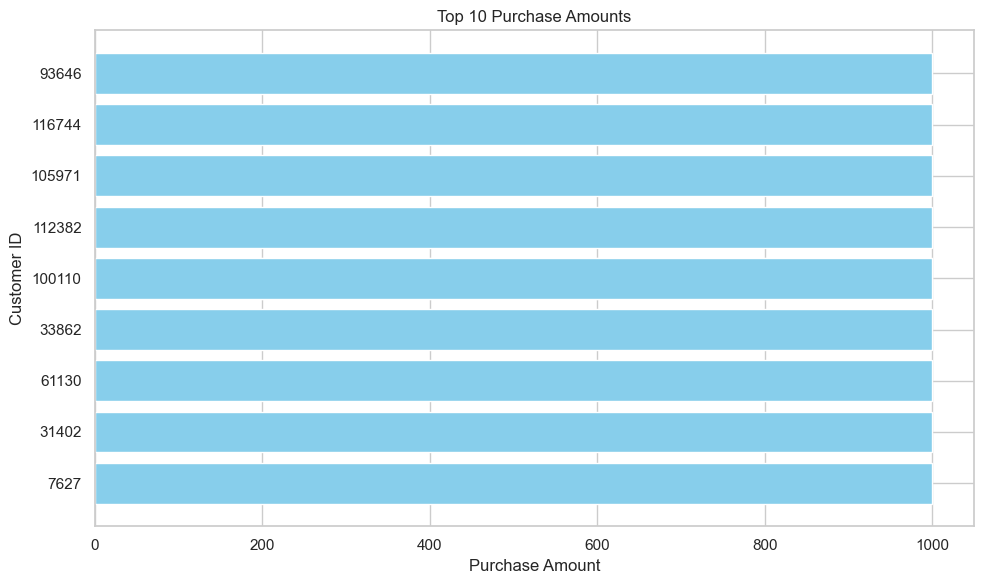

In [49]:
plt.figure(figsize=(10, 6))
plt.barh(top_10['CustomerID'].astype(str), top_10['PurchaseAmount'], color='skyblue')
plt.xlabel('Purchase Amount')
plt.ylabel('Customer ID')
plt.title('Top 10 Purchase Amounts')
plt.gca().invert_yaxis()  # Highest value at the top
plt.tight_layout()
plt.show()

Graph Description: Top 10 Purchase Amounts (Horizontal Bar Chart)
The code you provided generates a horizontal bar chart showing the top 10 purchase amounts in the dataset. Here's a breakdown of what each part does and what the graph means:
Code Explanation (Line-by-Line):
plt.figure(figsize=(10, 6))
Sets the size of the plot to 10 inches wide and 6 inches tall for better readability.

plt.barh(top_10['CustomerID'].astype(str), top_10['PurchaseAmount'], color='skyblue')
Draws horizontal bars (barh) for each of the top 10 customers.
x-axis (horizontal): Purchase Amount
y-axis (vertical): Customer IDs (converted to string to display properly as labels)
color='skyblue': Bars are light blue for a clean, readable look.

plt.xlabel('Purchase Amount')
plt.ylabel('Customer ID')
plt.title('Top 10 Purchase Amounts')
Adds labels and a title to the chart for better understanding:
X-axis shows the amount spent
Y-axis shows the customer ID
Title tells you what the chart is about
plt.gca().invert_yaxis()
Inverts the y-axis so that the customer with the highest purchase amount appears at the top (which is more intuitive when ranking).

plt.tight_layout()
plt.show()
tight_layout() adjusts spacing to prevent label cutoff.
show() displays the graph.

What the Graph Tells:
*Each bar represents a customer in the top 10 highest purchase amounts.
*The longer the bar, the higher the amount that customer spent.
*The topmost bar (after inverting the y-axis) shows the customer with the highest purchase.
*Useful for identifying high-value customers for marketing, loyalty programs, or fraud detection.

**PLOT2 : BOXPLOT OF PURCHASE AMOUNT**

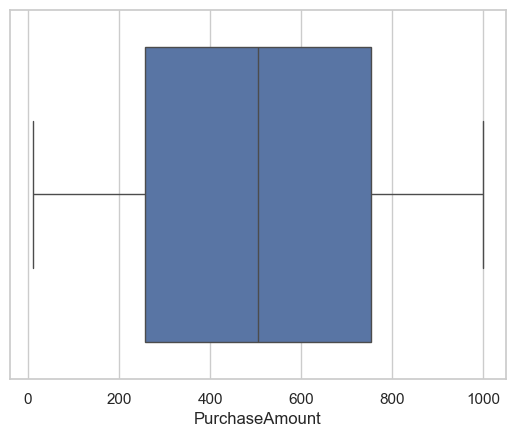

In [50]:
sns.boxplot(x=df['PurchaseAmount'])
plt.show()

Boxplot of PurchaseAmount – Key Points
📌 1. Median (Q2):
Represented by the line inside the box.
Indicates the middle value of all purchase amounts.

📌 2. Interquartile Range (IQR):
The box covers values between the 1st quartile (Q1) and 3rd quartile (Q3).
Contains the middle 50% of the data.
A wider box = higher variability in the central range.

📌 3. Whiskers:
Extend from the box to the lowest and highest non-outlier values.
Typically go up to 1.5 × IQR beyond Q1 and Q3.

📌 4. Outliers:
Shown as individual dots outside the whiskers.
Represent unusually high or low purchase amounts.
Helps spot customers with exceptional spending behavior.

📌 5. Skewness:
If the median is not centered and whiskers are uneven:
Right-skewed: Longer tail on the right → few very high purchases.
Left-skewed: Longer tail on the left → few very low purchases.

📌 6. Data Summary:
Helps you quickly assess:
Data spread
Central tendency
Presence of anomalies
Whether the distribution is symmetrical or skewed

**PLOT3 : HISTOGRAM OF PURCHASE AMOUNT**

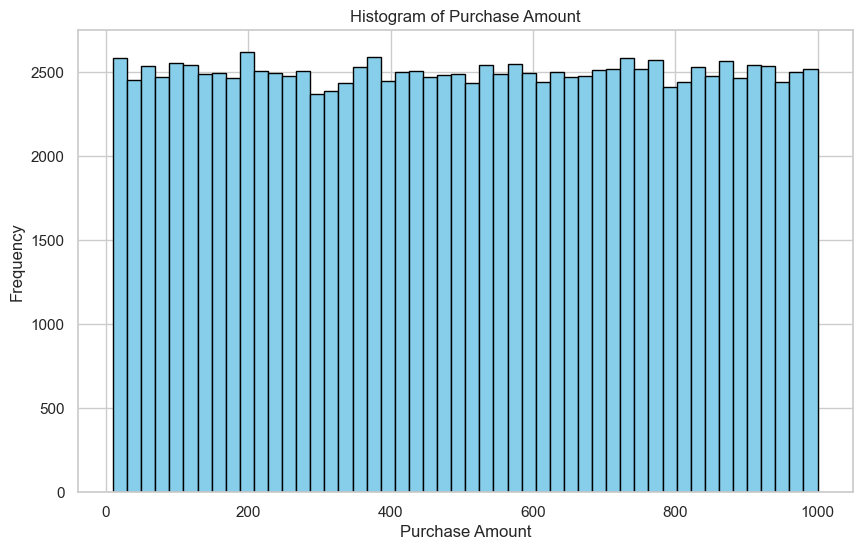

In [51]:
plt.figure(figsize=(10, 6))
plt.hist(df['PurchaseAmount'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Purchase Amount')
plt.xlabel('Purchase Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

What This Histogram Shows:
A histogram is used to visualize the distribution of a numeric variable — here, it shows how PurchaseAmount values are spread across different ranges.

🔍 Explanation of the Code and Graph
✅ plt.hist(df['PurchaseAmount'], bins=50, ...)
Breaks the range of PurchaseAmount into 50 bins (intervals)
Each bar shows how many purchases fall within that range.
Higher bar = More frequent purchases in that price range.
✅ color='skyblue', edgecolor='black'
Gives the bars a clean blue color with black outlines for better visibility.
✅ plt.xlabel('Purchase Amount') & plt.ylabel('Frequency')
X-axis: Ranges of PurchaseAmount.
Y-axis: Count of records in each range.
✅ plt.grid(True)
Adds a grid to the plot for easier reading of values.
✅ plt.title(...)
Displays the title at the top of the plot.

📌 Key Insights You Can Draw
Central Tendency: Where is the highest bar? That range contains the most common purchase amounts.
Spread: Wide range of bins with non-zero height? Purchases are widely distributed.
Skewness:
If most values are on the left and a long tail stretches right → Right-skewed (few customers spending a lot).
If most values are on the right and tail on the left → Left-skewed.
Outliers: Very tall bars at extreme right or left? Potential spending anomalies.

**PLOT4 : PurchaseAmount differ between Genders**

<Axes: xlabel='Gender', ylabel='PurchaseAmount'>

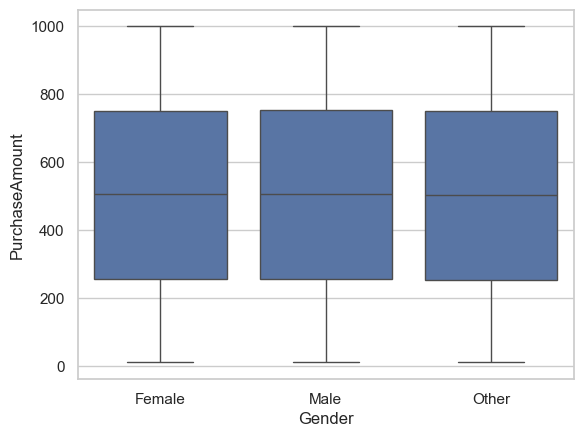

In [52]:
sns.boxplot(x='Gender', y='PurchaseAmount', data=df)

📌 Key Points:
✅ X-axis: Represents Gender categories (e.g., Male, Female).
✅ Y-axis: Represents PurchaseAmount values.

📊 Box Components Meaning:
📍 Middle line inside the box = Median purchase amount for each gender.
📦 Box (IQR) = Shows the middle 50% of purchase data (Q1 to Q3).
➖ Whiskers = Extend to values within 1.5 × IQR from the box (non-outliers).
🔴 Dots outside whiskers = Outliers (very high or very low purchases).

📈 Insights You Can Gain:
📊 Compare medians: See which gender tends to spend more on average.
📐 Measure variability: Wider box = more variability in spending.
🎯 Identify outliers: Spot customers who made unusually high purchases.
↔️ Check skewness: Asymmetry in the box or whiskers suggests skewed distribution.

**PLOT5 : PURCHASE AMOUNT DISTRIBUTED AMONG OTHERS**

<Axes: >

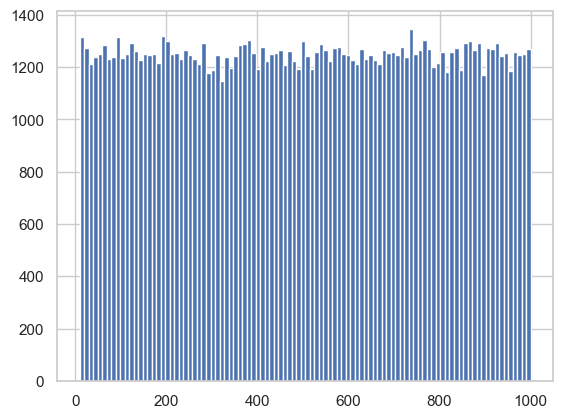

In [53]:
df['PurchaseAmount'].hist(bins=100) 

✅ Purpose of the Code:
Plots a histogram of the PurchaseAmount column.
Divides the full range of purchase amounts into 100 bins (intervals).
Shows how many transactions fall into each amount range.

🧱 Graph Features:
X-axis: Purchase amount ranges (from low to high).
Y-axis: Frequency (number of purchases in each range).
Bins=100: Provides a detailed view of the distribution by using 100 small intervals.

🔍 What You Can Analyze:
1)Most Frequent Purchase Ranges:
Tallest bars represent the most common purchase amount ranges.

2)Skewness:
If bars are taller on the left with a long tail on the right → Right-skewed.
Suggests most people spend small amounts, with few high spenders.

3)Outliers:
Small bars far from the main group can indicate rare high purchase amounts.

4)Spread:
Wide distribution of bars indicates greater variability in spending.
Narrow, tall bars = more consistent spending.

5)Peaks and Gaps:
Peaks = common price points.
Gaps = amount ranges with few or no purchases.

**PLOT6 : SHAPE OF DISTRIBUTION**

<Axes: xlabel='PurchaseAmount', ylabel='Count'>

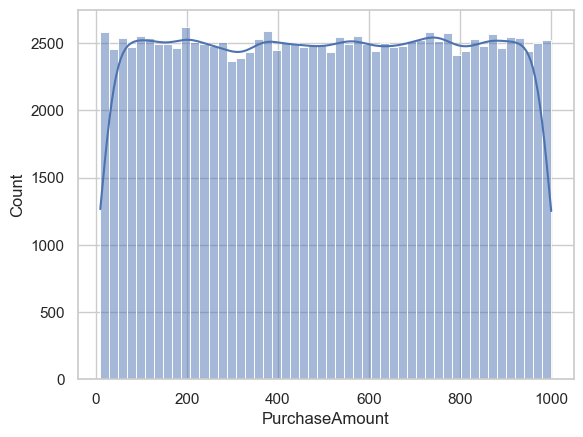

In [54]:
sns.histplot(df['PurchaseAmount'], kde=True)

✅ Purpose of the Code:
Plots a histogram to show frequency of purchase amounts.
Adds a KDE line, which is a smooth curve estimating the probability density of the data.

🔍 Key Graph Components:
X-axis: Purchase Amount ranges.
Y-axis: Count of purchases (bars) and density (KDE line).
Histogram: Shows how often different purchase amounts occur.
KDE Line: Smooth curve representing the data’s distribution pattern.

📊 What Can BE LearnED:
1)Peak of Spending:
Highest point of the KDE = most common purchase range.

2)Skewness:
If KDE curve tails off to the right → Right-skewed → many low purchases, few large ones.
If it tails to the left → Left-skewed.

3)Spread/Range:
KDE width and bar spread show how varied the purchase amounts are.

4)Multimodality:
If the KDE curve has multiple peaks, it indicates multiple common purchase ranges (possibly different customer groups).

5)Outliers:
Bars far from the main peak with a flat KDE tail indicate rare, high-value transactions.

**PLOT7 : AVERAGE OF PURCHASE AMOUNT**

In [55]:
average_purchase = df['PurchaseAmount'].mean()
print(average_purchase)

504.99353288


It gives the mean value of purchase amount

**PLOT8 : AVERAGE PURCHASE GRAPH**

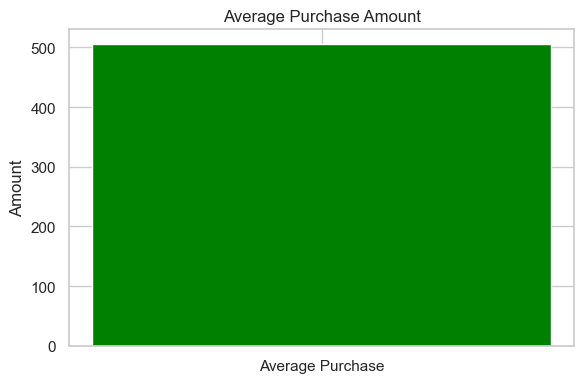

In [56]:
plt.figure(figsize=(6, 4))
plt.bar(['Average Purchase'], [average_purchase], color='green')
plt.ylabel('Amount')
plt.title('Average Purchase Amount')
plt.tight_layout()
plt.show()

📌 Explanation in Points:
✅ Purpose of the Code:
Plots a bar chart with a single bar representing the average value of the PurchaseAmount column.

🔍 Key Graph Elements:
X-axis: Label "Average Purchase" (a single category).
Y-axis: Amount value (shows the average purchase).
Bar height: Represents the numerical value of the average purchase amount.
Color: Green for clarity and emphasis.

📊 What You Can Learn:
1)Quick Summary Metric:
Shows the central tendency (mean) of all purchase values.
Useful to compare with medians or other averages from different segments.

2)Reference for Comparison:
Can be used as a benchmark when analyzing individual or group-wise purchase behavior.

3)Insight into Customer Behavior:
If the average is high, it may indicate a wealthier customer base or expensive products.
If low, it might suggest frequent but small transactions.

**PLOT9 : MODE OF PURCHASE AMOUNT**

In [57]:
mode = df['PurchaseAmount'].mode()
print(mode)

0    805.04
Name: PurchaseAmount, dtype: float64


It give mode of the purchase amount

**PLOT10 : MODE OF PURCHASE AMOUNT GRAPH**

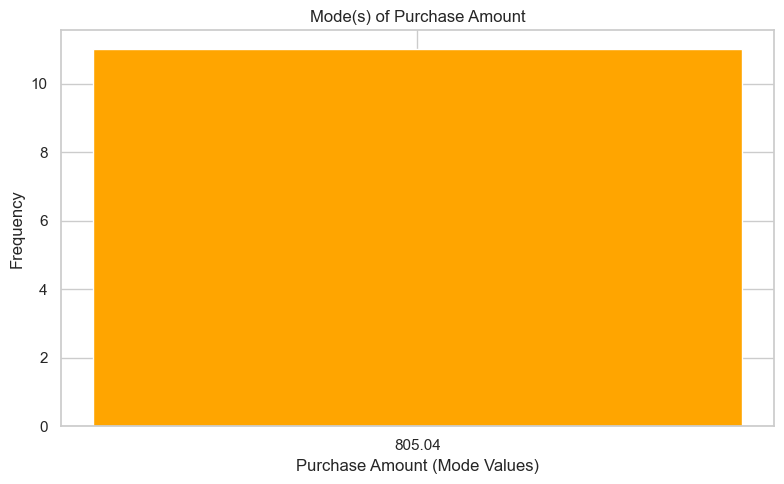

In [58]:
mode = df['PurchaseAmount'].value_counts().loc[mode]
plt.figure(figsize=(8, 5))
plt.bar(mode.index.astype(str), mode.values, color='orange')
plt.xlabel('Purchase Amount (Mode Values)')
plt.ylabel('Frequency')
plt.title('Mode(s) of Purchase Amount')
plt.tight_layout()
plt.show()

📌 Explanation in Points:
✅ Purpose of the Code:
Finds the mode(s) of PurchaseAmount — the value(s) that appear most often.
Plots a bar chart showing those most frequent purchase amounts and how many times they occurred.

🔍 Key Graph Components:
X-axis: Mode values (purchase amounts with the highest frequency).
Y-axis: Number of times those values occur in the dataset.
Bar Color: Orange (used for visual contrast).
Chart Title: Clearly states that the chart is about mode(s) of purchase.

📊 What You Can Learn:
1)Most Common Purchase Amount(s):
Shows which amount(s) customers spend most frequently.

2)Single vs Multiple Modes:
One bar → unimodal distribution.
Multiple bars → multimodal distribution (more than one equally frequent value).

3)Purchase Patterns:
Identifies common transaction sizes — useful in pricing strategies or promotions.

4)Data Density:
A very high frequency at the mode may suggest bulk buying or common price points (e.g., ₹1000 offers).